# simple linear regression model with Tensorboard and model save or restore

In [1]:
import os
import pylab
import numpy as np
import seaborn as sns
import tensorflow as tf

In [2]:
#global settings
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#only using CPU, set 1,2,3 to it to use GPU, if remove this, using all GPUs
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [3]:
#test data
X = np.linspace(0,1,100)
noise = np.random.random(100)*0.5
y = 0.8*X + 0.5 + noise 
n = X.shape[0]

In [4]:
#parameters
learning_rate = 0.1
epochs = 500 
step = 100
#loger path
log_path = "./logs/"
#model save and restore path, ckpt is it's specific file type
model_path = "./logs/linearRegression.ckpt"

In [5]:
#tf required setting 
tf_X = tf.placeholder("float",name="X")
tf_y = tf.placeholder("float",name="y")
#tf learning parameters
w = tf.Variable(np.random.random(),name="weight")
b = tf.Variable(np.random.random(),name="bias")

In [6]:
#a linear model name filed definitation 
with tf.name_scope("model"):
    pred = tf.add(tf.multiply(tf_X,w),b)
with tf.name_scope("loss"):
    cost = tf.reduce_sum(tf.pow(pred-tf_y,2)) / (2*n)
with tf.name_scope("SGD"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
#pre-setting as tensorboard & save
init = tf.global_variables_initializer()
#log
tf.summary.scalar("loss",cost)
merged_summary_op = tf.summary.merge_all()
#saver to save and restore all the variables
saver = tf.train.Saver()

In [8]:
#tensorflow running 
print "1st session"
with tf.Session() as sess:
    sess.run(init)
    #log system
    summary_writer = tf.summary.FileWriter(log_path,graph=tf.get_default_graph())
    
    for epoch in xrange(250):
        for (nx,ny) in zip (X,y):
            sess.run(optimizer,feed_dict={tf_X:nx,tf_y:ny})
        if epoch % step == 0:
            c,summary = sess.run([cost,merged_summary_op],feed_dict={tf_X:X,tf_y:y})
            s = "Epoch:%s,cost:%s,w:%s,b:%s"%(epoch,c,sess.run(w),sess.run(b))
            print s
        #log system
        summary_writer.add_summary(summary,epoch)
    save_path = saver.save(sess,model_path)
    print "Model saved in %s"%save_path

1st session
Epoch:0,cost:0.0290324,w:0.724061,b:0.597317
Epoch:100,cost:0.00998632,w:0.806444,b:0.749691
Epoch:200,cost:0.00998611,w:0.807385,b:0.749177
Model saved in ./logs/linearRegression.ckpt


In [9]:
#a new session to restore the model and keep running
print "2st session"
with tf.Session() as sess:
    sess.run(init)
    #log system
    summary_writer = tf.summary.FileWriter(log_path,graph=tf.get_default_graph())
    #restore model
    load_path = saver.restore(sess,model_path)
    print "Model restored from %s"%save_path
    for epoch in xrange(250,epochs):
        for (nx,ny) in zip (X,y):
            sess.run(optimizer,feed_dict={tf_X:nx,tf_y:ny})
        if epoch % step == 0:
            c,summary = sess.run([cost,merged_summary_op],feed_dict={tf_X:X,tf_y:y})
            s = "Epoch:%s,cost:%s,w:%s,b:%s"%(epoch,c,sess.run(w),sess.run(b))
            print s
        #log system
        summary_writer.add_summary(summary,epoch)
    save_path = saver.save(sess,model_path)
    print "Model saved in %s again"%save_path

2st session
INFO:tensorflow:Restoring parameters from ./logs/linearRegression.ckpt
Model restored from ./logs/linearRegression.ckpt
Epoch:300,cost:0.00998604,w:0.807863,b:0.748915
Epoch:400,cost:0.00998601,w:0.808109,b:0.74878
Model saved in ./logs/linearRegression.ckpt again


In [10]:
#use the mode
print "3st session"
nX = np.linspace(0.5,0.8,30)
noise = np.random.random(30)*0.6
ny = 0.8*nX + 0.5 + noise
with tf.Session() as sess:
    sess.run(init)
    load_path = saver.restore(sess,model_path)
    print "Model restored from %s again"%save_path
    nyp,c = sess.run([pred,cost],feed_dict={tf_X:nX,tf_y:ny})
    print "Finish the new prediction"

3st session
INFO:tensorflow:Restoring parameters from ./logs/linearRegression.ckpt
Model restored from ./logs/linearRegression.ckpt again
Finish the new prediction


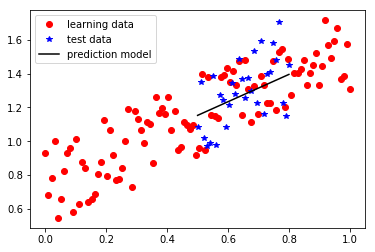

In [11]:
#show the raw and second batch data 
fig,ax = pylab.subplots()
ax.plot(X,y,"ro",label="learning data")
ax.plot(nX,ny,"b*",label="test data")
ax.plot(nX,nyp,"k",label="prediction model")
ax.legend()
pylab.show()